# Unveiling the Dynamics of Housing Market in Northwestern County

## 1. Business Understanding

### Data Analytic Question

Seldovatt Realtors is a company that perform duties, such as study property listings, interview prospective clients, accompany clients to property site, discuss conditions of sale, and draw up real estate contracts.The company is looking for valuable insights that influence house prices in Northwastern County.

### Problem statement

Identifying underlying factors driving house prices in Northwestern County by conducting a comprehensive analysis using historical sales data and employing multiple linear regression to identify the significant factors affecting house prices and build a reliable predictive model.

## 2. Data Understanding

In [186]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [187]:
# Load the dataset
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [188]:
# Check the dimension of the dataset
data.shape

(21597, 21)

In [189]:
# Remove irrelevant columns
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data.drop(columns_to_drop, axis=1, inplace=True)

In [190]:
# Check data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [191]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


## 3. Data preparation

In [192]:
# Identifying the Missing Data
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [193]:
data.dropna(axis=0, inplace=True)

In [194]:
# Check unique values in categorical columns
print("\nUnique Values (Categorical Columns):")
categorical_columns = ['waterfront', 'condition', 'grade']
for column in categorical_columns:
    unique_values = data[column].unique()
    print(column + ":")
    print(unique_values)
    print()


Unique Values (Categorical Columns):
waterfront:
['NO' 'YES']

condition:
['Average' 'Very Good' 'Good' 'Poor' 'Fair']

grade:
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']



In [195]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001


In [196]:
data.corr()['price']

C:\Users\Frankline\AppData\Local\Temp\ipykernel_5976\2971354294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


id            -0.017439
price          1.000000
bedrooms       0.309651
bathrooms      0.527350
sqft_living    0.704652
sqft_lot       0.087005
floors         0.258277
yr_built       0.053525
Name: price, dtype: float64

In [197]:
waterfront_df = pd.get_dummies(data, columns=["waterfront"])
waterfront_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_NO,waterfront_YES
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,1,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,1,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,1,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,Average,11 Excellent,2001,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,Average,8 Good,2008,1,0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,2009,1,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2014,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,2009,1,0


In [198]:
waterfront_df["rate"] = waterfront_df["grade"].str.split().apply(lambda x: x[0])
waterfront_df["Grade"] = waterfront_df["grade"].str.split().apply(lambda x: x[1])
waterfront_df.drop('grade', axis=1, inplace=True)
waterfront_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,waterfront_NO,waterfront_YES,rate,Grade
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,1951,1,0,7,Average
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,1933,1,0,6,Low
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,1965,1,0,7,Average
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,1987,1,0,8,Good
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,Average,2001,1,0,11,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,Average,2008,1,0,8,Good
21592,263000018,360000.0,3,2.50,1530,1131,3.0,Average,2009,1,0,8,Good
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,Average,2014,1,0,8,Good
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,Average,2009,1,0,7,Average


In [199]:
waterfront_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19221 non-null  int64  
 1   price           19221 non-null  float64
 2   bedrooms        19221 non-null  int64  
 3   bathrooms       19221 non-null  float64
 4   sqft_living     19221 non-null  int64  
 5   sqft_lot        19221 non-null  int64  
 6   floors          19221 non-null  float64
 7   condition       19221 non-null  object 
 8   yr_built        19221 non-null  int64  
 9   waterfront_NO   19221 non-null  uint8  
 10  waterfront_YES  19221 non-null  uint8  
 11  rate            19221 non-null  object 
 12  Grade           19221 non-null  object 
dtypes: float64(3), int64(5), object(3), uint8(2)
memory usage: 1.8+ MB


In [200]:
data_2 = pd.get_dummies(waterfront_df, columns=["Grade", "condition"])
data_2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,waterfront_YES,...,Grade_Low,Grade_Luxury,Grade_Mansion,Grade_Poor,Grade_Very,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,1,0,...,0,0,0,0,0,1,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,1,0,...,1,0,0,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,1,0,...,0,0,0,0,0,1,0,0,0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,2001,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,2008,1,0,...,0,0,0,0,0,1,0,0,0,0
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,1,0,...,0,0,0,0,0,1,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,1,0,...,0,0,0,0,0,1,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,1,0,...,0,0,0,0,0,1,0,0,0,0


In [201]:
data_2.corr()['price']

C:\Users\Frankline\AppData\Local\Temp\ipykernel_5976\2699983079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_2.corr()['price']


id                    -0.017439
price                  1.000000
bedrooms               0.309651
bathrooms              0.527350
sqft_living            0.704652
sqft_lot               0.087005
floors                 0.258277
yr_built               0.053525
waterfront_NO         -0.276295
waterfront_YES         0.276295
Grade_Average         -0.314470
Grade_Better           0.234284
Grade_Excellent        0.348996
Grade_Fair            -0.082596
Grade_Good             0.000390
Grade_Low             -0.210360
Grade_Luxury           0.300243
Grade_Mansion          0.221488
Grade_Poor            -0.005419
Grade_Very             0.341465
condition_Average      0.005486
condition_Fair        -0.050132
condition_Good        -0.031809
condition_Poor        -0.018335
condition_Very Good    0.061251
Name: price, dtype: float64

## 4. Modeling

In [219]:
# Select relevant features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors']
target = 'price'

In [220]:
# Prepare the data
X = data_2[features]
y = data_2[target]

In [225]:
X = sm.add_constant(X)

In [227]:
# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     4050.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:23:49   Log-Likelihood:            -2.6691e+05
No. Observations:               19221   AIC:                         5.338e+05
Df Residuals:                   19215   BIC:                         5.339e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.024e+04   8240.671      9.737      0.000    6.41e+04    9.64e+04
bedrooms    -6.153e+04   2521.744    -24.401      0.000   -6.65e+04   -5.66e+04
bathrooms    5886.8297   4099.486      1.436      0.151   -2148.522    1.39e+04
sqft_living   320.2577      3.352     95.529      0.000     313.687     326.829
sqft_lot       -0.4298      0.047     -9.152      0.000      -0.522      -0.338
floors      -2567.5139   4053.142     -0.633      0.526   -1.05e+04    5376.999
==============================================================================
Omnibus:                    12890.910   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445427.282
Skew:                           2.747   Prob(JB):                         0.00
Kurtosis:                      25.934   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

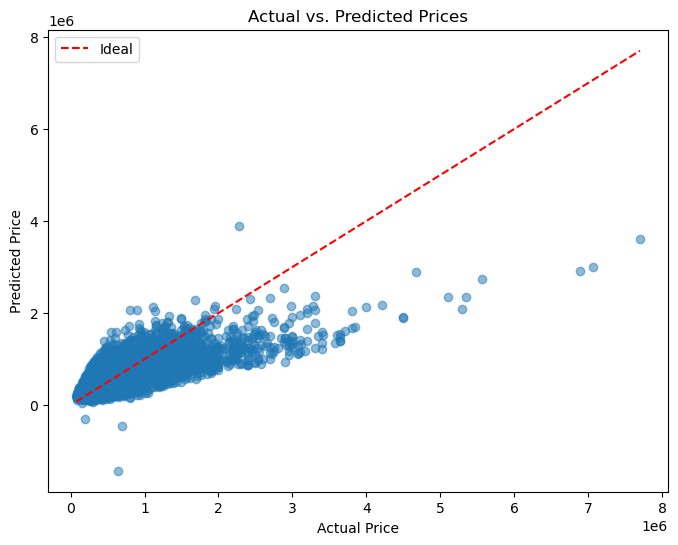

In [229]:
# Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y, results.predict(), alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

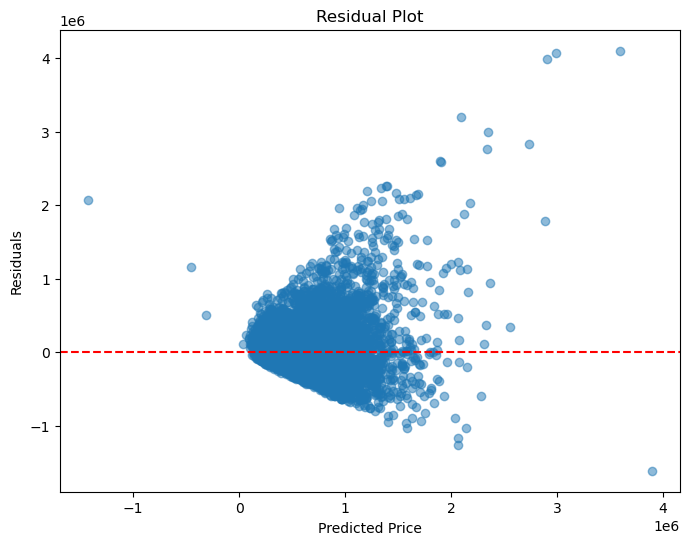

In [230]:
# Residual Plot
plt.figure(figsize=(8, 6))
residuals = results.resid
predicted = results.predict()
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

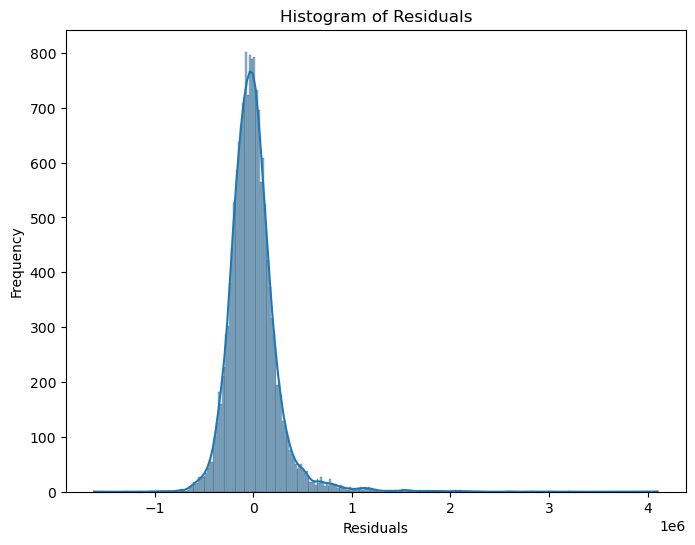

In [231]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

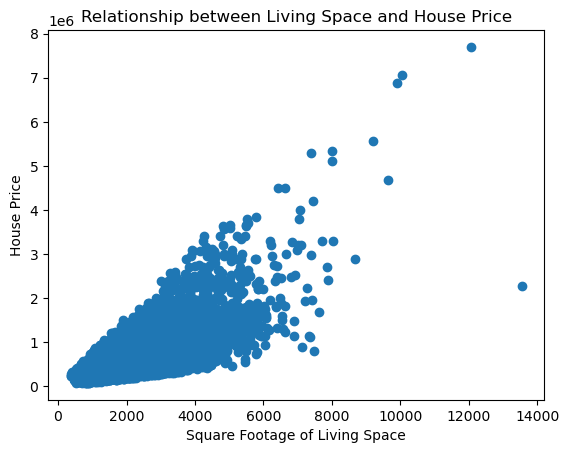

In [232]:
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Square Footage of Living Space')
plt.ylabel('House Price')
plt.title('Relationship between Living Space and House Price')
plt.show()

<Figure size 800x600 with 0 Axes>

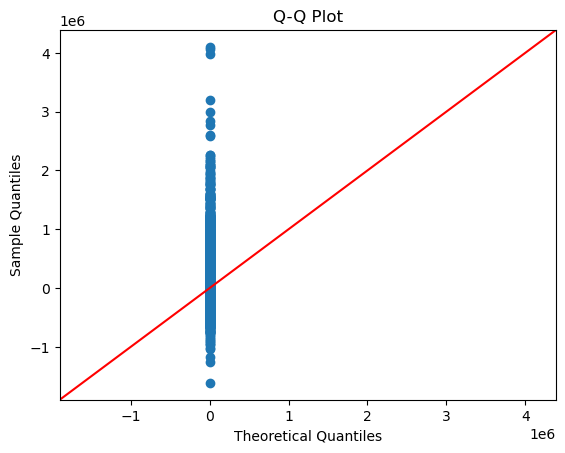

In [234]:
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()